# Question 1) Part 4:

Analyse how the two different regularisation techniques affect regression weights in
terms of their values and what are the differences between the two.

In [28]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt

# For Lasso

Read the data set, drop serial number and chance of admit from it and add column of all 1's. Create initial theta of size 8 (7 coulumns + 1 for interceot), initialized by all zeros.


In [29]:
filename="./AdmissionDataset/data.csv"
data = pd.read_csv(filename)
# data = data.sample(frac=1)

def normalise(data,columns):
    for i in columns:
        mean=data[i].mean()
        std=data[i].std()
        data[i]=(data[i]-mean)/std
    return data

columns=['GRE Score','TOEFL Score','University Rating','SOP','LOR ' ,'CGPA','Research']
data=normalise(data,columns)

data.insert(0,'all_ones',1)

train, validate = np.split(data,[int(.8*len(data))])
train=train.drop(['Serial No.'],axis=1)

yactual=train['Chance of Admit ']

temp_train=train
train=train.drop(['Chance of Admit '],axis=1)

y_validate=validate['Chance of Admit ']
validate=validate.drop(['Serial No.'],axis=1)
temp_validate=validate
validate=validate.drop(['Chance of Admit '],axis=1)


theta=np.zeros(8)#7 for columns + 1 for beta0

For each labmda value ranging from 0.1 to 50, with step size 0.1, train the model using gradient decent for 1000 iterations using the formula:

$$𝜃𝑗:=𝜃𝑗−𝛼.1/𝑚Σ(ℎ𝜃(𝑥(𝑖))−𝑦(𝑖))𝑥(𝑖)𝑗−𝛼∗𝜆∗𝑠𝑖𝑔𝑛(𝑤𝑗)/2𝑚$$

Find the error for each lambda, that this trained theta is causing using MSE formula:

$$MSE = \displaystyle\frac{1}{n}\sum_{t=1}^{n}e_t^2  $$

In [30]:
def gradientDescent(x,yactual,theta,alpha):
    num_of_rows,cols=np.shape(x)
    col_length=np.shape(theta)
    error_list=[]
    lambda_list=[]
    lambda_log=[]
    theta_list=[] #store theta corresponding to each lambda value use it for validation
    x=np.array(x)
    lambda_val=0.1
    while lambda_val<100:
        theta=np.zeros(col_length[0])#for training, for each lambda value, theta would be made zero(start afresh for each lambda)
        for i in range(0,1000):
            pred=np.dot(x,theta.T)
            loss_value = pred - yactual
            gradient_0=np.dot(x[:,0],loss_value)
            theta[0]=theta[0]-(alpha*(gradient_0/num_of_rows))
            for j in range(1,col_length[0]):
                gradient=np.dot(x[:,j],loss_value)
                lamda_part=(lambda_val*np.sign(theta[j]))/2  #np.abs(theta[j]) due to lasso
                theta[j]=theta[j] - (alpha * ((gradient+lamda_part)/(num_of_rows)))
        theta_list.append(theta)#store the theta value you get after training over a lambda value
        lamda_y_pred=np.dot(x,theta)
        loss=np.sum((lamda_y_pred-yactual)**2)/(2*num_of_rows)
        error_list.append(loss)
        lambda_list.append(lambda_val)
        lambda_log.append(np.log(lambda_val))
        lambda_val+=0.1
    return theta_list,error_list,lambda_list,lambda_log

In [31]:
theta_list,error_list,lambda_list,lambda_log=gradientDescent(train,yactual,theta,0.001)

In [32]:
def plot_lambda_vs_weights(theta_list,lambda_list,name):
    theta_1=[]
    for i in range(len(theta_list)):
        theta_1.append(theta_list[i][1])
    theta_2=[]
    for i in range(len(theta_list)):
        theta_2.append(theta_list[i][2])
    theta_3=[]
    for i in range(len(theta_list)):
        theta_3.append(theta_list[i][3])
    theta_4=[]
    for i in range(len(theta_list)):
        theta_4.append(theta_list[i][4])
    theta_5=[]
    for i in range(len(theta_list)):
        theta_5.append(theta_list[i][5])
    theta_6=[]
    for i in range(len(theta_list)):
        theta_6.append(theta_list[i][6])
    theta_7=[]
    for i in range(len(theta_list)):
        theta_7.append(theta_list[i][7])
        
    plt.figure(figsize=(7,7))
    plt.title(name+': lambda vs weight')
    plt.xlabel(name, fontsize=18)
    plt.ylabel('weights', fontsize=16)
    plt.plot(lambda_list,theta_1,label='b1')
    plt.plot(lambda_list,theta_2,label='b2')
    plt.plot(lambda_list,theta_3,label='b3')
    plt.plot(lambda_list,theta_4,label='b4')
    plt.plot(lambda_list,theta_5,label='b5')
    plt.plot(lambda_list,theta_6,label='b6')
    plt.plot(lambda_list,theta_7,label='b7')
    plt.legend(loc='best')
    


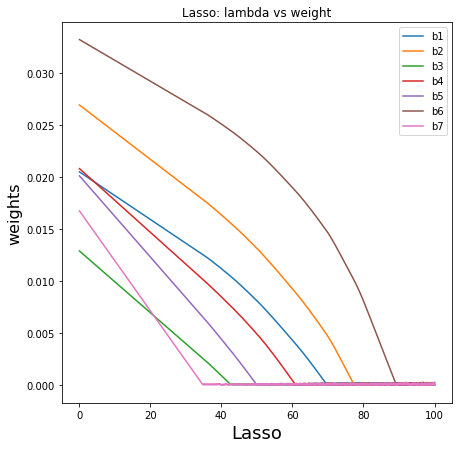

In [33]:
plot_lambda_vs_weights(theta_list,lambda_list,'Lasso')

# For Ridge

For each labmda value ranging from 0.1 to 50, with step size 0.1, train the model using gradient decent for 1000 iterations using the formula:

$$𝜃𝑗:=𝜃𝑗−𝛼.1/𝑚Σ(ℎ𝜃(𝑥(𝑖))−𝑦(𝑖))𝑥(𝑖)𝑗−𝛼∗𝜆∗𝑤𝑗/2𝑚$$

Find the error for each lambda, that this trained theta is causing using MSE formula:

$$MSE = \displaystyle\frac{1}{n}\sum_{t=1}^{n}e_t^2  $$

In [34]:
def gradientDescent_ridge(x,yactual,theta,alpha):
    num_of_rows,cols=np.shape(x)
    col_length=np.shape(theta)
    error_list=[]
    lambda_list=[]
    lambda_log=[]
    theta_list=[] #store theta corresponding to each lambda value use it for validation
    x=np.array(x)
    lambda_val=0.1
    while lambda_val<100:
        theta=np.zeros(col_length[0])#for training, for each lambda value, theta would be made zero(start afresh for each lambda)
        for i in range(0,1000):
            pred=np.dot(x,theta)
            loss_value = pred - yactual
            gradient_0=(np.dot(x[:,0],loss_value))
            theta[0]=theta[0]-(alpha*(gradient_0/num_of_rows))
            for j in range(1,col_length[0]):
                gradient=(np.dot(x[:,j],loss_value))
                lamda_part=(lambda_val*theta[j]) #differentiation of theta square for ridge
                theta[j]=theta[j] - (alpha * ((gradient+lamda_part)/(num_of_rows)))
        theta_list.append(theta)#store the theta value you get after training over a lambda value
        lamda_y_pred=np.dot(x,theta)
        loss=np.sum((lamda_y_pred-yactual)**2)/(2*num_of_rows)#+(lambda_val*np.sum(np.square(theta)))/num_of_rows
        error_list.append(loss)
        lambda_list.append(lambda_val)
        lambda_log.append(np.log(lambda_val))
        lambda_val+=0.1
    return theta_list,error_list,lambda_list,lambda_log

In [35]:
theta_list_ridge,error_list_ridge,lambda_list_ridge,lambda_log_ridge=gradientDescent_ridge(train,yactual,theta,0.001)

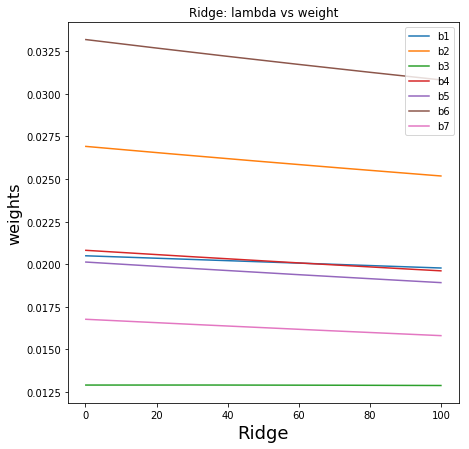

In [36]:
plot_lambda_vs_weights(theta_list_ridge,lambda_list_ridge,'Ridge')

# Observation

As the lambda value increases the weights decrease.
This decrease is drastic in case of Lasso regression compared to ridge regression because, lasso regression is L1 regularization, so it makes weights close to zero faster in comparison to ridge which is L2 regression.